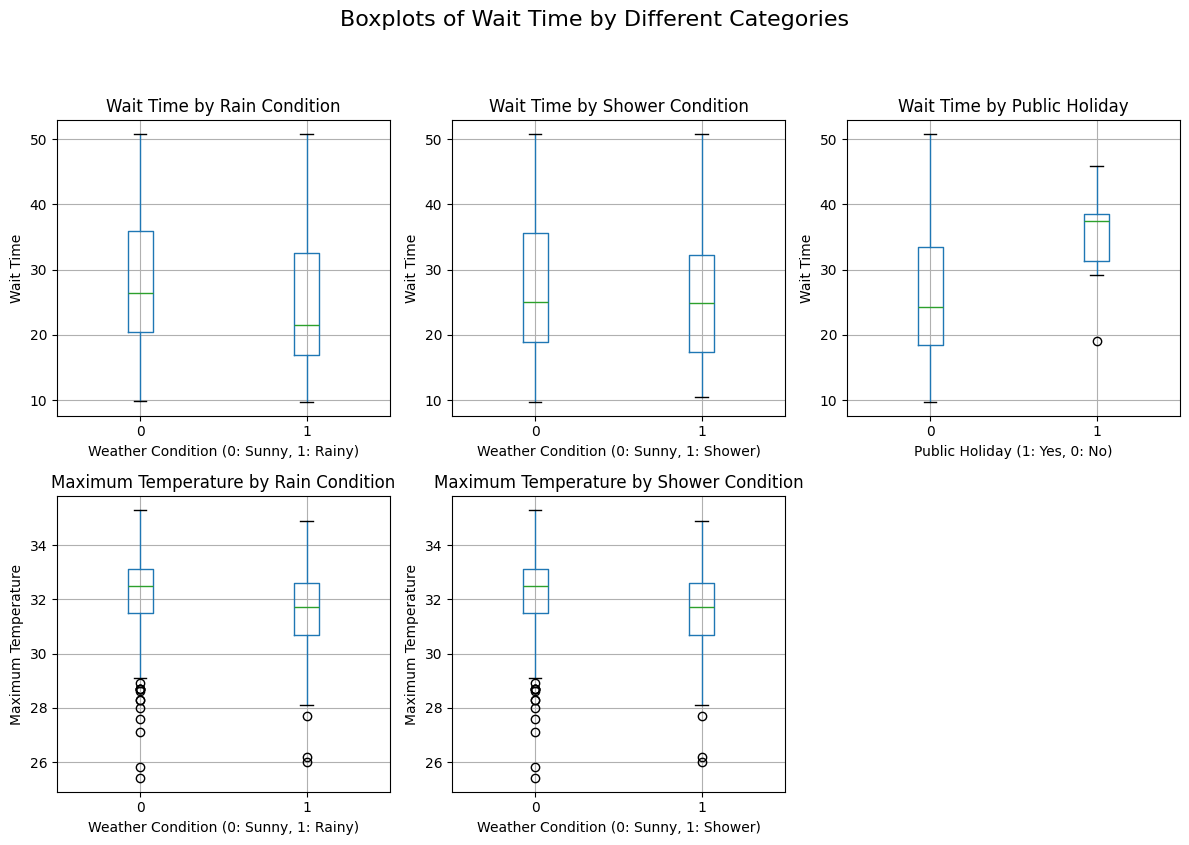

T-test result for Rain Condition (Rainy day vs. Sunny day) on Wait Time:
t-statistic: -2.75974245553365, p-value: 0.006127726836158158

T-test result for Shower Condition (Shower day vs. Sunny day) on Wait Time:
t-statistic: -0.6546434347726308, p-value: 0.5131812006284102

T-test result for Public Holiday (Public Holiday vs. Non-Public Holiday) on Wait Time:
t-statistic: 2.887042549943655, p-value: 0.004161208344213392

T-test result for Rain Condition (Rainy day vs. Sunny day) on Maximum Temperature:
t-statistic: -5.8473781702539585, p-value: 1.2626781804078274e-08

T-test result for Shower Condition (Shower day vs. Sunny day) on Maximum Temperature:
t-statistic: -2.5565650045319575, p-value: 0.011045898562074372

Intercept: 12.21
Coefficients: Max Temp: 0.45, Rainfall: -0.06, Public Holiday: 8.86
Wait Time = 12.21 + (0.45 × Maximum Temperature) + (-0.06 × Rainfall) + (8.86 × Public Holiday)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

weather_df = pd.read_csv('../data/2023_daily_weather_with_wait_times_and_conditions.csv')

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

weather_df.boxplot(column='Wait Time', by='Rain Condition', ax=axs[0, 0])
axs[0, 0].set_title('Wait Time by Rain Condition')
axs[0, 0].set_xlabel('Weather Condition (0: Sunny, 1: Rainy)')
axs[0, 0].set_ylabel('Wait Time')

weather_df.boxplot(column='Wait Time', by='Shower Condition', ax=axs[0, 1])
axs[0, 1].set_title('Wait Time by Shower Condition')
axs[0, 1].set_xlabel('Weather Condition (0: Sunny, 1: Shower)')
axs[0, 1].set_ylabel('Wait Time')

weather_df.boxplot(column='Wait Time', by='Public Holiday', ax=axs[0, 2])
axs[0, 2].set_title('Wait Time by Public Holiday')
axs[0, 2].set_xlabel('Public Holiday (1: Yes, 0: No)')
axs[0, 2].set_ylabel('Wait Time')

weather_df.boxplot(column='Maximum Temperature (°C)', by='Shower Condition', ax=axs[1, 0])
axs[1, 0].set_title('Maximum Temperature by Rain Condition')
axs[1, 0].set_xlabel('Weather Condition (0: Sunny, 1: Rainy)')
axs[1, 0].set_ylabel('Maximum Temperature')

weather_df.boxplot(column='Maximum Temperature (°C)', by='Shower Condition', ax=axs[1, 1])
axs[1, 1].set_title('Maximum Temperature by Shower Condition')
axs[1, 1].set_xlabel('Weather Condition (0: Sunny, 1: Shower)')
axs[1, 1].set_ylabel('Maximum Temperature')

axs[1, 2].axis('off')

plt.tight_layout()
plt.suptitle('Boxplots of Wait Time by Different Categories', fontsize=16, y=1.05)  # Title for the whole figure

plt.show()

# T-test for Wait Time by Rain Condition (Rainy day vs. Sunny day)
rainy_groups = [weather_df[weather_df['Rain Condition'] == 1]['Wait Time'], weather_df[weather_df['Rain Condition'] == 0]['Wait Time']]
rain_condition_ttest_result = stats.ttest_ind(*rainy_groups)
print("T-test result for Rain Condition (Rainy day vs. Sunny day) on Wait Time:")
print(f"t-statistic: {rain_condition_ttest_result.statistic}, p-value: {rain_condition_ttest_result.pvalue}\n")

# T-test for Wait Time by Shower Condition (Shower day vs. Sunny day)
shower_groups = [weather_df[weather_df['Shower Condition'] == 1]['Wait Time'], weather_df[weather_df['Shower Condition'] == 0]['Wait Time']]
shower_condition_ttest_result = stats.ttest_ind(*shower_groups)
print("T-test result for Shower Condition (Shower day vs. Sunny day) on Wait Time:")
print(f"t-statistic: {shower_condition_ttest_result.statistic}, p-value: {shower_condition_ttest_result.pvalue}\n")

# T-test for Wait Time by Public Holiday (Public Holiday vs. Non-Public Holiday)
public_holiday_groups = [weather_df[weather_df['Public Holiday'] == 1]['Wait Time'], weather_df[weather_df['Public Holiday'] == 0]['Wait Time']]
public_holiday_ttest_result = stats.ttest_ind(*public_holiday_groups)
print("T-test result for Public Holiday (Public Holiday vs. Non-Public Holiday) on Wait Time:")
print(f"t-statistic: {public_holiday_ttest_result.statistic}, p-value: {public_holiday_ttest_result.pvalue}\n")

# T-test for Maximum Temperature by Rain Condition (Rainy day vs. Sunny day)
rainy_groups_1 = [weather_df[weather_df['Rain Condition'] == 1]['Maximum Temperature (°C)'], weather_df[weather_df['Rain Condition'] == 0]['Maximum Temperature (°C)']]
rain_condition_ttest_result_1 = stats.ttest_ind(*rainy_groups_1)
print("T-test result for Rain Condition (Rainy day vs. Sunny day) on Maximum Temperature:")
print(f"t-statistic: {rain_condition_ttest_result_1.statistic}, p-value: {rain_condition_ttest_result_1.pvalue}\n")

# T-test for Wait Time by Shower Condition (Shower day vs. Sunny day)
shower_groups_1 = [weather_df[weather_df['Shower Condition'] == 1]['Maximum Temperature (°C)'], weather_df[weather_df['Shower Condition'] == 0]['Maximum Temperature (°C)']]
shower_condition_ttest_result_1 = stats.ttest_ind(*shower_groups_1)
print("T-test result for Shower Condition (Shower day vs. Sunny day) on Maximum Temperature:")
print(f"t-statistic: {shower_condition_ttest_result_1.statistic}, p-value: {shower_condition_ttest_result_1.pvalue}\n")

weather_df['Maximum Temperature (°C)'] = weather_df['Maximum Temperature (°C)'].fillna(weather_df['Maximum Temperature (°C)'].median())
weather_df['Daily Rainfall Total (mm)'] = weather_df['Daily Rainfall Total (mm)'].fillna(weather_df['Daily Rainfall Total (mm)'].median())

X = weather_df[['Maximum Temperature (°C)', 'Daily Rainfall Total (mm)', 'Public Holiday']]
y = weather_df['Wait Time']

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_

print(f"Intercept: {intercept:.2f}")
print(f"Coefficients: Max Temp: {coefficients[0]:.2f}, Rainfall: {coefficients[1]:.2f}, Public Holiday: {coefficients[2]:.2f}")
print(f"Wait Time = {intercept:.2f} + ({coefficients[0]:.2f} × Maximum Temperature) + ({coefficients[1]:.2f} × Rainfall) + ({coefficients[2]:.2f} × Public Holiday)")
